In [12]:
import pickle
import polars as pl
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("dark_background")

# dfs = pickle.load(open(f"join0.2leave0.4.p", "rb"))

# nr_frames = pl.max(dfs['frame'])
# nr_reds = np.zeros(nr_frames)
# nr_blues = np.zeros(nr_frames)
# nr_total_individuals = pl.max(dfs['id'])+1

# for frame in range(max(dfs["frame"])):
#     indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
#     for i,ind in enumerate(indiv):
#         if ind[-1] == 1:
#             nr_reds[frame] += 1
#         elif ind[-1] == 2:
#             nr_blues[frame] += 1

# nr_neutral = np.asarray([nr_total_individuals]*nr_frames-nr_reds-nr_blues)/50
# nr_reds = nr_reds/50
# nr_blues = nr_blues/50

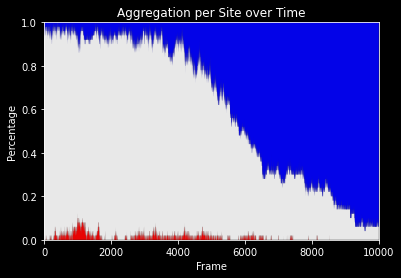

In [36]:
# plt.style.use("dark_background")

# fig, ax = plt.subplots()

# fig = plt.stackplot(range(nr_frames),
#               [nr_reds,nr_neutral,nr_blues],
#               labels=['reds', 'neutral', 'blue'],
#               colors=['red','white','blue'],
#               alpha=.9)

# ax.set_xlim([0,10000])
# ax.set_ylim([0,1])

# ax.set_title("Aggregation per Site over Time")
# # ax.set_ylabel("Percentahe of birds in a flock")
# ax.set_xlabel("Frame")
# ax.set_ylabel('Percentage')
# # plt.legend(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])

# ax.set_facecolor("#202020")

In [19]:
def get_blue_white_red_proportions(p_join,p_leave):
    dfs = pickle.load(open(f"hpo/j{p_join:.1f}l{p_leave:.1f}.p", "rb"))
    nr_frames = pl.max(dfs['frame'])
    nr_reds = np.zeros(nr_frames)
    nr_blues = np.zeros(nr_frames)
    nr_total_individuals = pl.max(dfs['id'])+1

    for frame in range(max(dfs["frame"])):
        indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
        for i,ind in enumerate(indiv):
            if ind[-1] == 1:
                nr_reds[frame] += 1
            elif ind[-1] == 2:
                nr_blues[frame] += 1

    nr_neutral = np.asarray([nr_total_individuals]*nr_frames-nr_reds-nr_blues)/50
    nr_reds = nr_reds/50
    nr_blues = nr_blues/50

    return nr_reds, nr_neutral, nr_blues, nr_frames

In [20]:
l = []
for j,experiment_p_leave in enumerate(np.linspace(0,1,10,endpoint=False)):
      for i,experiment_p_join in enumerate(np.linspace(0,1,10,endpoint=False)):
        nr_reds, nr_neutral, nr_blues, nr_frames = get_blue_white_red_proportions(experiment_p_join,experiment_p_leave)
        l.append([nr_reds, nr_neutral, nr_blues, nr_frames])
# for j,experiment_p_leave in enumerate(np.linspace(0,1,10,endpoint=False)):
#       for i,experiment_p_join in enumerate(np.linspace(0,1,10,endpoint=False)):
#         print(l[i+j*10])

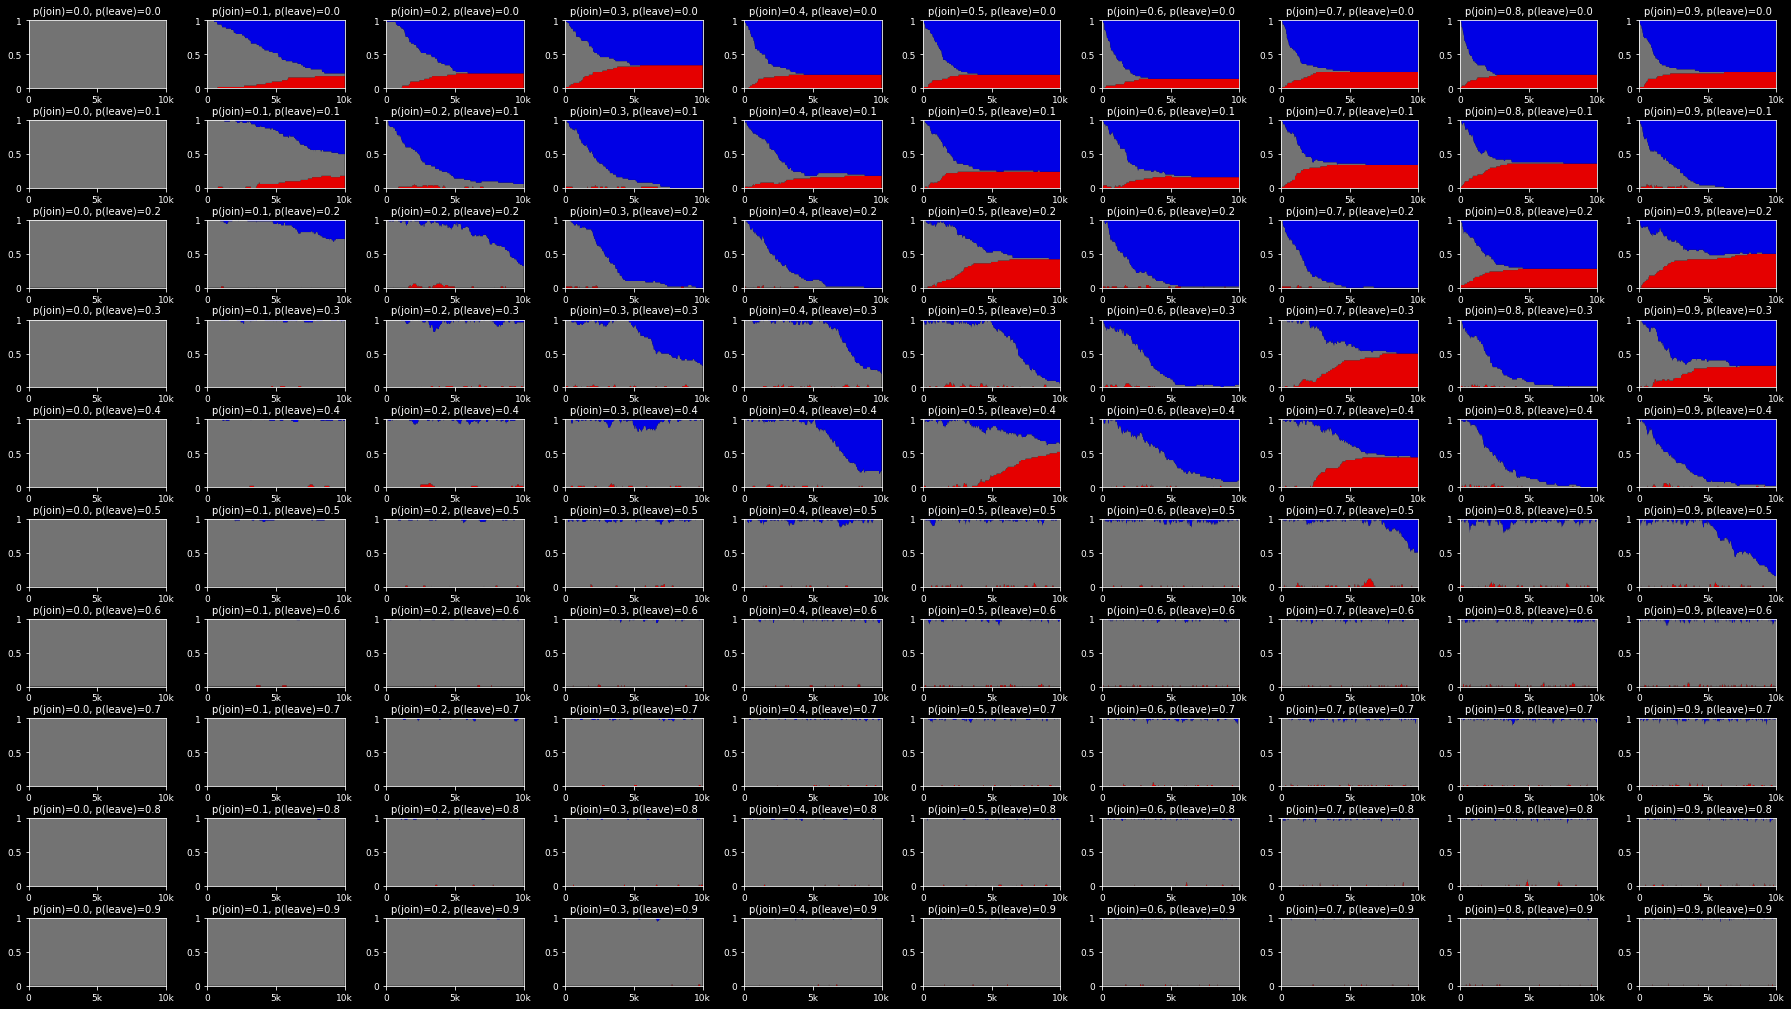

In [21]:
fig_dfo, axs = plt.subplots(10, 10, figsize=(25, 14))
fig_dfo.tight_layout()
for j,experiment_p_leave in enumerate(np.linspace(0,1,10,endpoint=False)):
      for i,experiment_p_join in enumerate(np.linspace(0,1,10,endpoint=False)):

            nr_reds, nr_neutral, nr_blues, nr_frames = l[i+j*10]

            axs[j,i].stackplot(range(nr_frames),
                  [nr_reds,nr_neutral,nr_blues],
                  colors=['red','grey','blue'],
                  alpha=.9)
            axs[j,i].set_title(f'p(join)={experiment_p_join:.1f}, p(leave)={experiment_p_leave:.1f}',fontsize=10)
            axs[j,i].set_xlim([0,10000])
            axs[j,i].set_ylim([0,1])
            axs[j,i].set_xticks([0,5000,10000])
            axs[j,i].set_xticklabels(['0','5k','10k'],fontdict={'fontsize': 9})
            axs[j,i].set_yticks([0,0.5,1])
            axs[j,i].set_yticklabels(['0','0.5','1'],fontdict={'fontsize': 9})

In [22]:
def get_blue_white_red_proportions_index(experiment_i):
    dfs = pickle.load(open(f"50runs/j.7_l.4_run{experiment_i}.p", "rb"))
    nr_frames = pl.max(dfs['frame'])
    nr_reds = np.zeros(nr_frames)
    nr_blues = np.zeros(nr_frames)
    nr_total_individuals = pl.max(dfs['id'])+1

    for frame in range(max(dfs["frame"])):
        indiv = dfs[["id","x","y","image_index"]][dfs["frame"]==frame].to_numpy()
        for i,ind in enumerate(indiv):
            if ind[-1] == 1:
                nr_reds[frame] += 1
            elif ind[-1] == 2:
                nr_blues[frame] += 1

    nr_neutral = np.asarray([nr_total_individuals]*nr_frames-nr_reds-nr_blues)/50
    nr_reds = nr_reds/50
    nr_blues = nr_blues/50

    return nr_reds, nr_neutral, nr_blues, nr_frames

In [23]:
l2 = []
for experiment_j in range(5):
    for experiment_i in range(10):
        nr_reds, nr_neutral, nr_blues, nr_frames = get_blue_white_red_proportions_index(experiment_j*10+experiment_i)
        l2.append([nr_reds, nr_neutral, nr_blues, nr_frames])

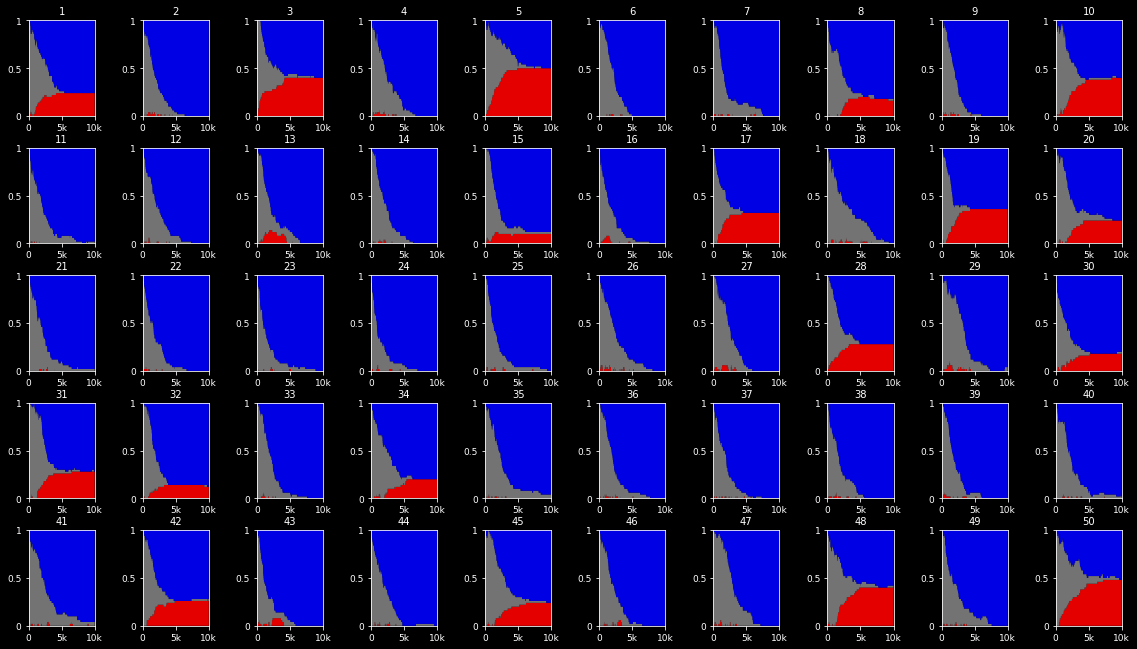

In [24]:
fig_dfo, axs = plt.subplots(5,10, figsize=(16,9))
fig_dfo.tight_layout()
for experiment_j in range(10):
    for experiment_i in range(5):

        nr_reds, nr_neutral, nr_blues, nr_frames = l2[experiment_j*5+experiment_i]

        axs[experiment_i,experiment_j].stackplot(range(nr_frames),
                [nr_reds,nr_neutral,nr_blues],
                colors=['red','grey','blue'],
                alpha=.9)
        axs[experiment_i,experiment_j].set_title(f'{experiment_i*10+experiment_j+1}',fontsize=10)
        axs[experiment_i,experiment_j].set_xlim([0,10000])
        axs[experiment_i,experiment_j].set_ylim([0,1])
        axs[experiment_i,experiment_j].set_xticks([0,5000,10000])
        axs[experiment_i,experiment_j].set_xticklabels(['0','5k','10k'],fontdict={'fontsize': 9})
        axs[experiment_i,experiment_j].set_yticks([0,0.5,1])
        axs[experiment_i,experiment_j].set_yticklabels(['0','0.5','1'],fontdict={'fontsize': 9})

In [29]:
# nr_reds, nr_neutral, nr_blues, nr_frames
dominances = []

for i, item in enumerate(l2):
    total_reds = sum(item[0][9000:])
    total_neutral = sum(item[1][9000:])
    total_blues = sum(item[2][9000:])

    total = total_reds + total_neutral + total_blues

    blue_dom = total_blues / total
    red_dom = total_reds / total

    dominances.append(blue_dom)
for i in range(5):
    print(f'{(i*0.1+0.5)} -> {(np.asarray(dominances) > i*0.1+0.5).sum()/0.5:.1f}%')


0.5 -> 98.0%
0.6 -> 92.0%
0.7 -> 86.0%
0.8 -> 72.0%
0.9 -> 64.0%
